<a href="https://colab.research.google.com/github/tirals88/Numerical-Mathematics-and-Computing/blob/main/Chap4_Interpolation_and_Numerical_Differentiation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math

# 4.1 다항식의 보간법

라그랑주 형태의 보간 다항식
$$ p_{n}(x) = \sum^{n}_{i=0}{l_{i}(x) f(x_{i})}$$
$$l_i(x)=\prod^{n}_{j\neq i, j=0}{\frac{x-x_{j}}{x_{i} - x_{j}}}$$

뉴턴 형태의 보간 다항식
$$ p_{0} = y_{0}$$
$$ p_{1} = p_{0} + c_{1}(x-x_{0}), \:\:  p_{1} = y_{1}$$
$$ ... $$
$$ p_{n+1} = p_{n} + c_{n+1}(x-x_{0})(x-x_{1})(x-x_{2})...(x-x_{n}), \:\:  p_{n+1} = y_{n+1}$$

축소형

$$p_{n+1} = c_{0} + (x-x_{0})(c_{1} + (x-x_{1})(c_{2} + ... + (x-x_{n-1})(c_{n} + (x-x_{n})(c_{n+1}))...))$$

분할차분

$$f(x_{k}) = c_{k}\prod^{k-1}_{j=0}{(x_{k} - x_{j})} + \sum^{k-1}_{i=0}{c_{i}}\prod^{i-1}_{j=0}{(x_{k} - x_{j})}$$

$$c_{k} = f[x_{0}, x_{1}, ..., x_{k}] = \frac{f(x_{k}) - \sum^{k-1}_{i=0}{f[x_{0}, x_{1}, ..., x_{i}]}\prod^{i-1}_{j=0}{(x_{k} - x_{j})}}{\prod^{k-1}_{j=0}{(x_{k} - x_{j})}}$$

분할차분의 재귀적 성질

$$f[x_{i}, x_{i+1}, ..., x_{j}] = \frac{f[x_{i+1}, x_{i+2}, ..., x_{j}] - f[x_{i}, x_{i+1}, ..., x_{j-1}]}{x_{j} - x_{i}}$$

In [ ]:
def Lagrange(f, X, n):
  a = np.array(f)
  for i in range(n+1):
    for j in range(n+1):
      if i!=j:
        a[i] = a[i]/((X[i] - X[j]))
  return a

def Eval_Lagrange(a, X, n, t):
  b = a.copy()
  for i in range(n+1):
    for j in range(n+1):
      if i!=j:
        a[i] = a[i]*(t - X[j])

  return b.sum()

In [ ]:
def Coef(f, X, n):
  a = np.array(f)
  for j in range(n):
    j = j+1
    for i in np.arange(n, j-1, -1):
      a[i] = (a[i] - a[i-1])/(X[i] - X[i-j])
      #print(a)
    #print(a)

  return a

X_range = [1, 3/2, 0, 2]
f_range = [3, 13/4, 3, 5/3]

Coef(f_range, X_range, 3)

array([ 3.        ,  0.5       ,  0.33333333, -2.        ])

In [ ]:
def Eval(a, X, n, t):
  temp = a[n]
  for i in np.arange(n-1, -1, -1):
    temp = temp*(t - X[i]) + a[i]

  return temp

In [ ]:
#예제 7 확인
t_1 = 2.1
3 + 0.5*(t_1 - 1) + 1/3*(t_1 - 1)*(t_1 - 1.5) -2*(t_1 -1)*(t_1 - 1.5)*t_1

0.9979999999999993

In [ ]:
Eval(Coef(f_range, X_range, 3), X_range, 3, t_1)

0.9979999999999993

In [ ]:
x_range = np.arange(0, 1.6875*10/9, 1.6875/9)
y_range = np.sin(x_range)

a_coef = Coef(y_range, x_range, 9)
a_coef

array([ 0.00000000e+00,  9.94150916e-01, -9.29289165e-02, -1.59415901e-01,
        1.51721688e-02,  7.38017905e-03, -7.34214749e-04, -1.55595434e-04,
        1.67087082e-05,  1.80764445e-06])

In [ ]:
x_range

array([0.    , 0.1875, 0.375 , 0.5625, 0.75  , 0.9375, 1.125 , 1.3125,
       1.5   , 1.6875])

In [ ]:
test_Coef_Eval = []
e_max = 0
i_max = 0
for i in np.arange(0, 4*9 +1):
  t = 1.6875/36*i
  p = Eval(a_coef, x_range, 9, t)
  e = np.abs(np.sin(t)-p)
  test_Coef_Eval.append([i, t, p, e])
  if e > e_max:
    e_max = e
    i_max = i

df = pd.DataFrame(test_Coef_Eval, columns=['i', 'x', 'interpolation', 'error'])
print('i_max = {}, e_max = {}'.format(i_max, e_max))
df

i_max = 35, e_max = 4.901773431598144e-10


,i,x,interpolation,error
0,0,0.000000,0.000000,0.000000e+00
1,1,0.046875,0.046858,4.306864e-10
2,2,0.093750,0.093613,3.441858e-10
3,3,0.140625,0.140162,1.468799e-10
4,4,0.187500,0.186403,0.000000e+00
5,5,0.234375,0.232235,6.265269e-11
6,6,0.281250,0.277557,6.183787e-11
7,7,0.328125,0.322269,3.171385e-11
8,8,0.375000,0.366273,0.000000e+00
9,9,0.421875,0.409472,1.850758e-11


반데몬드 행렬

$$ \varphi_{0}, ..., \varphi_{n} : 기저함수$$
$$f(x) \approx c_{0}\varphi_{0}(x) + c_{1}\varphi_{1}(x) + ... + c_{n}\varphi_{n}(x)$$

$$f(x_{i}) = y_{i}$$

$$⇓$$

$$ Ac = 𝐘 $$

\begin{equation}
\begin{bmatrix}
\varphi_{0}(x_{0}) & \varphi_{1}(x_{0}) & \cdots & \varphi_{n}(x_{0})\\
\varphi_{0}(x_{1}) & \varphi_{1}(x_{1}) & \cdots & \varphi_{n}(x_{1})\\
\varphi_{0}(x_{2}) & \varphi_{1}(x_{2}) & \cdots & \varphi_{n}(x_{2})\\
\vdots & \vdots & \ddots & \vdots\\
\varphi_{0}(x_{n}) & \varphi_{1}(x_{n}) & \cdots & \varphi_{n}(x_{n})\\
\end{bmatrix}
\begin{bmatrix}
c_{0}\\
c_{1}\\
c_{2}\\
\vdots\\
c_{n}\\
\end{bmatrix}
=
\begin{bmatrix}
y_{0}\\
y_{1}\\
y_{2}\\
\vdots\\
y_{n}\\
\end{bmatrix}
\end{equation}

$$⇓$$

반데몬드행렬 :
\begin{equation}
\begin{bmatrix}
1 & x_{0} & x_{0}^2 & \cdots & x_{0}^2 \\
1 & x_{1} & x_{1}^2 & \cdots & x_{1}^2 \\
1 & x_{2} & x_{2}^2 & \cdots & x_{2}^2 \\
\vdots & \vdots & \vdots & \ddots & \vdots\\
1 & x_{n} & x_{n}^2 & \cdots & x_{n}^2 \\
\end{bmatrix}
\begin{bmatrix}
c_{0}\\
c_{1}\\
c_{2}\\
\vdots\\
c_{n}\\
\end{bmatrix}
=
\begin{bmatrix}
y_{0}\\
y_{1}\\
y_{2}\\
\vdots\\
y_{n}\\
\end{bmatrix}
\end{equation}

기저함수로 라그랑주 기수 다항식 $l_{i}(x)$, 뉴턴 다항식 $π_{i}(x)$, 단항식 등이 있다.

이들 보다 좋은 성능의 다항식으로 체비셰프 다항식 Chebyshev polynomial 이 있다.

$$ T_{0}(x) = 1, T_{1}(x) = x$$
$$ T_{i}(x) = 2x\;T_{i-1}(x) - T_{i-2}(x)$$

In [ ]:
x_range = np.arange(-1, 1.01, 0.01)
T = np.ones([6, len(x_range)])
T[1, :] = x_range

for i in range(len(x_range)):
  x = x_range[i]
  for j in range(4):
    j = j + 2
    T[j, i] = 2*x*T[j-1, i] - T[j-2, i]

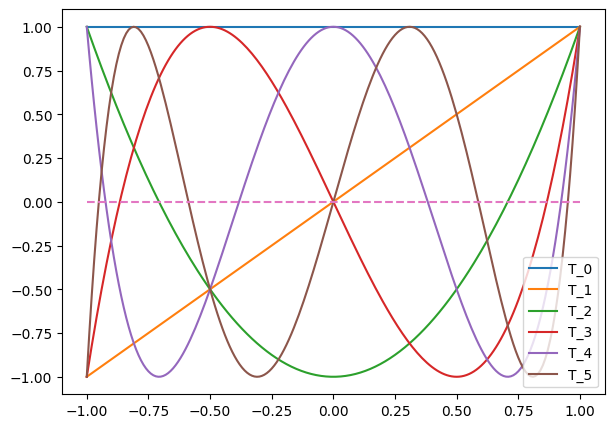

In [ ]:
plt.figure(figsize=(7, 5))
for i in range(6):
  plt.plot(x_range, T[i, :], label='T_{}'.format(i))
plt.plot(x_range, np.zeros(len(x_range)), '--')
plt.legend()
plt.show()

체비셰프 다항식의 극점들은 크기는 같고 부호가 교대로 바뀌고 있어 기저 함수로 사용하였을 때, 오차가 균일하게 분배되는 경향이 있다.

**또한 다항식에서 보간점들을 함수의 근이나 체비셰프 다항식의 극점으로 잡는 것이 특히 좋다.**

역보간

역함수를 근사할 때 사용된다.

In [ ]:
x_range_ = [1.0, 2.0, 3.0, 4.0, 5.0]
y_range_ = [-0.5789200, -0.3626370, -0.1849160, -0.0340642, 0.0969858]
Coef(x_range_, y_range_, 4)

array([1.        , 4.62357189, 2.54623091, 0.9250304 , 0.25041047])

In [ ]:
Eval(Coef(x_range_, y_range_, 4), y_range_, 4, 0.0)

4.24747000676607

In [ ]:
Eval(Lagrange(x_range_, y_range_, 4), y_range_, 4, 0)

0.6124890625721306

네빌의 알고림을 통한 다항식 보건법

뉴턴의 알고리즘처럼 단계별로 다항식을 만든다

In [ ]:
#1
x1 = np.array([1, 2, 3, -4, 5])
y1 = np.array([2, 48, 272, 1182, 2262])
Eval(Coef(y1, x1, 4), x1, 4, -1)

12

In [ ]:
#3
x3 = np.arange(0, 2*11/10, 2/10)
y3 = np.exp(x3)
a_coef = Coef(y3, x3, 10)

In [ ]:
test_Coef_Eval_3 = []
e_max = 0
i_max = 0
for i in np.arange(0, 10*10 +1):
  t = 2/100 * i
  p = Eval(a_coef, x3, 10, t)
  e = np.abs(np.exp(t)-p)
  test_Coef_Eval_3.append([i, t, p, e])
  if e > e_max:
    e_max = e
    i_max = i

Eval_3 = pd.DataFrame(test_Coef_Eval_3, columns=['i', 'x', 'interpolation', 'error'])
print('i_max = {}, e_max = {}'.format(i_max, e_max))
Eval_3

i_max = 97, e_max = 6.379332617711952e-10


,i,x,interpolation,error
0,0,0.00,1.000000,0.000000e+00
1,1,0.02,1.020201,3.510603e-10
2,2,0.04,1.040811,5.109340e-10
3,3,0.06,1.061837,5.454925e-10
4,4,0.08,1.083287,5.035976e-10
...,...,...,...,...
96,96,1.92,6.820958,5.869758e-10
97,97,1.94,6.958751,6.379333e-10
98,98,1.96,7.099327,5.995160e-10
99,99,1.98,7.242743,4.133023e-10


In [ ]:
#5
x5 = np.arange(0, 10.1, 0.1)

In [ ]:
#7
x_range = np.arange(0, 1.6875*10/9, 1.6875/9)
y_range = np.sin(x_range)

a_coef = Coef(y_range, x_range, 9)

test_Coef_Eval = []
e_max = 0
i_max = 0
for i in np.arange(0, 4*9 +1):
  t = 1.6875/36*i
  p = Eval(a_coef, x_range, 9, t)
  e = np.abs(np.sin(t)-p)
  test_Coef_Eval.append([i, t, p, e])
  if e > e_max:
    e_max = e
    i_max = i

df = pd.DataFrame(test_Coef_Eval, columns=['i', 'x', 'interpolation', 'error'])
print('i_max = {}, e_max = {}'.format(i_max, e_max))
df

i_max = 35, e_max = 4.901773431598144e-10


,i,x,interpolation,error
0,0,0.000000,0.000000,0.000000e+00
1,1,0.046875,0.046858,4.306864e-10
2,2,0.093750,0.093613,3.441858e-10
3,3,0.140625,0.140162,1.468799e-10
4,4,0.187500,0.186403,0.000000e+00
5,5,0.234375,0.232235,6.265269e-11
6,6,0.281250,0.277557,6.183787e-11
7,7,0.328125,0.322269,3.171385e-11
8,8,0.375000,0.366273,0.000000e+00
9,9,0.421875,0.409472,1.850758e-11


In [ ]:
b_coef = Lagrange(y_range, x_range, 9)

In [ ]:
b_coef

array([  -0.        ,   16.14067218, -126.8622374 ,  431.00128551,
       -826.32395186,  977.18053309, -729.18909322,  334.87026851,
        -86.37314824,    9.55567323])

In [ ]:
test_Coef_Eval = []
e_max = 0
i_max = 0
for i in np.arange(0, 4*9 +1):
  t = 1.6875/36*i
  p = Eval_Lagrange(b_coef, x_range, 9, t)
  e = np.abs(np.sin(t)-p)
  test_Coef_Eval.append([i, t, p, e])
  if e > e_max:
    e_max = e
    i_max = i

df = pd.DataFrame(test_Coef_Eval, columns=['i', 'x', 'interpolation', 'error'])
print('i_max = {}, e_max = {}'.format(i_max, e_max))
df

i_max = 34, e_max = 0.9997365760093756


,i,x,interpolation,error
0,0,0.000000,0.000002,0.000002
1,1,0.046875,0.000000,0.046858
2,2,0.093750,0.000000,0.093613
3,3,0.140625,0.000000,0.140162
4,4,0.187500,0.000000,0.186403
5,5,0.234375,0.000000,0.232235
6,6,0.281250,0.000000,0.277557
7,7,0.328125,0.000000,0.322269
8,8,0.375000,0.000000,0.366273
9,9,0.421875,0.000000,0.409472


In [ ]:
#9
x_temp = [0, 5, 10, 15]
y_visco = [1.792, 1.519, 1.308, 1.140]
print("보간법 : 8도에서 점성 ", Eval(Coef(y_visco, x_temp, 3), x_temp, 3,  8))
print("역보간법 : 점성이 0인 온도 ", Eval(Coef(x_temp, y_visco, 3), y_visco, 3, 0))

보간법 : 8도에서 점성  1.386176
역보간법 : 점성이 0인 온도  84.399551488


In [ ]:
#11
x_11 = [0, 1, 2, 3, 4, 5]
y_11 = [0, 1, 2.001, 3, 4, 5]
print("x = 14 : ", Eval(Coef(y_11, x_11, 3), x_11, 3, 14), "\nx = 20 : ", Eval(Coef(y_11, x_11, 3), x_11, 3, 20))

x = 14 :  12.99900000000011 
x = 20 :  16.770000000000355


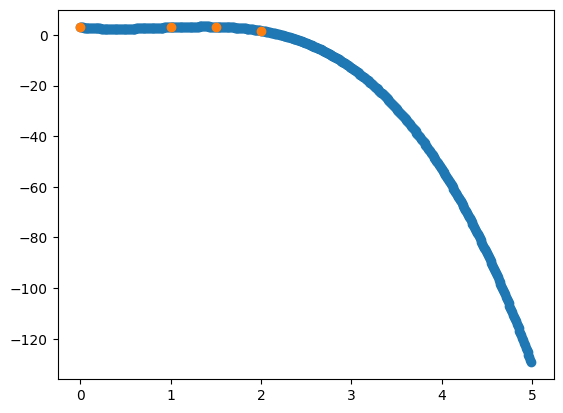

In [ ]:
#13
X_13 = [1, 3/2, 0, 2]
f_13 = [3, 13/4, 3, 5/3]
gx_13 = np.arange(0, 5, 0.01)
gy_13 = Eval(Coef(f_13, X_13, 3), X_13, 3, gx_13)

plt.figure()
plt.scatter(gx_13, gy_13)
plt.scatter(X_13, f_13)
plt.show()

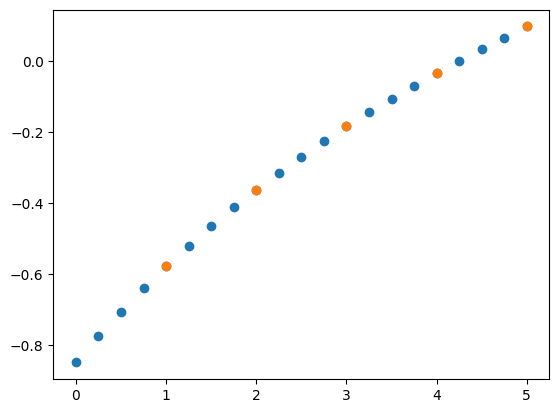

In [ ]:
#15
x_range_ = [1.0, 2.0, 3.0, 4.0, 5.0]
y_range_ = [-0.5789200, -0.3626370, -0.1849160, -0.0340642, 0.0969858]
coef15 = Coef(y_range_, x_range_, 4)
t_ = np.arange(0, 5.1, 0.25)
test_Coef_Eval = []
e_max = 0
i_max = 0
for i in np.arange(0, 5*4 +1):
  t = 5.0/20*i
  p = Eval(coef15, x_range_, 4, t)
  test_Coef_Eval.append(p)
  # if e > e_max:
  #   e_max = e
  #   i_max = i
plt.figure()
plt.scatter(t_, test_Coef_Eval)
plt.scatter(x_range_, y_range_)
plt.show()

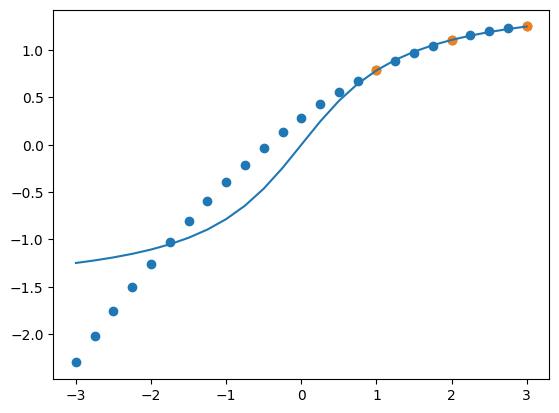

In [ ]:
#17
x_17 = [1, 2, 3]
y_17 = np.arctan(x_17)
coef17 = Coef(y_17, x_17, 2)
t_ = np.arange(-3.0, 3.1, 0.25)
test_Coef_Eval = []
for i in np.arange(0, 3*4*2 +1):
  t = -3.0 + 3.0/12*i
  p = Eval(coef17, x_17, 2, t)
  test_Coef_Eval.append(p)
  # if e > e_max:
  #   e_max = e
  #   i_max = i
plt.figure()
plt.plot(t_, np.arctan(t_))
plt.scatter(t_, test_Coef_Eval)
plt.scatter(x_17, y_17)
plt.show()

#4.2 보간 다항식에서의 오차

이론적으로 다항식 $p$를 이용해 함수 $f$를 근사했을 때 보간의 각 노드에서 $f$와 $p$의 차이는 0이다.

자연스럽게 예상할 수 있는 것은 함수 $f$가 모든 중간점에서 잘 근사될 것이고, 특히 노드의 숫자가 증가하면 $f$와 $p$가 훨씬 더 일치하게 될 것이라는 점이다.

그렇지만 점을 추가할수록 곡선은 요동치게 된다. 이는 $n$차 다항식은 $n$개의 근을 가지므로 $x$축과 대개 $n$번 교차하고 수없이 많이 방향 전환을 해야하기 때문이다.

[ 8.001    -1.000125]
[ 8.001      -1.000125    0.20004167]
[ 8.001      -1.000125    0.20004167 -0.32501042]
[ 8.001      -1.000125    0.20004167 -0.32501042 -0.26070387]


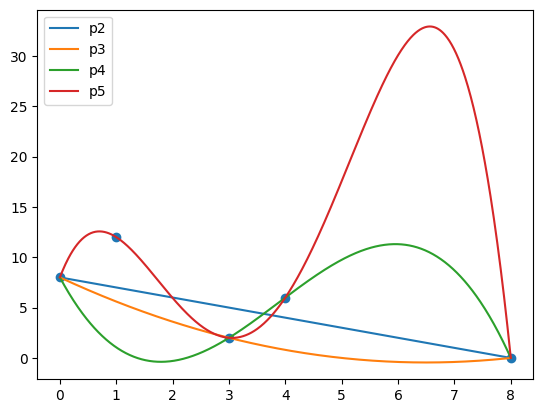

In [ ]:
#예시
x_t0 = [0, 8, 3, 4, 1]
y_t0 = [8.001, 0, 2, 6, 12]
testx = np.arange(0, 8.01, 0.01)

plt.figure()

for i in range(4):
  i = i+1
  coef_t0 = Coef(y_t0[:i+1], x_t0[:i+1], i)
  print(coef_t0)
  testy = Eval(coef_t0, x_t0[:i+1], i, testx)
  plt.plot(testx, testy, label='p{}'.format(i+1))

plt.scatter(x_t0, y_t0)
plt.legend()
plt.show()

##룽게 함수 Runge function

$$f(x) = (1+x^{2})^{-1}$$

끝점을 포함한 구간 $[-5, 5]$내 $(n+1)$개의 등간격의 점에서 이 함수를 보간하는 다항식을 $p_{n}$이라고 하자. 그러면 다음이 성립한다.

$$\lim_{n\to\infty} \max_{-5\leq x\leq 5} |f(x) - p_{n}(x)| = \infty$$

이를 통해 높은 차수의 보간 다항식은 위험한 연산이란 것을 다시 볼 수 있다.

또한 우리의 직관과는 달리 균등 분할한 노드를 사용하는 것은 보통 보간법에서 매우 나쁜 선택이다.

함수의 근이나 체비셰프 다항식의 극점을 활용하는 것이 좋다.

$[a, b]$에서 $(n+1)$개의 체비셰프 노드
$$x_{i} = \frac{1}{2}(a+b) + \frac{1}{2}(b-a)\cos[(\frac{2i+1}{2n+2})\pi]  \:\:\:(0\leq i\leq n)$$

In [ ]:
def exftn1(x):

  return 1/(np.square(x) + 1)

In [ ]:
#[a, b]에서 (n+1)개의 체비셰프 노드

def Chev_node(a, b, n):
  nodes = []
  for i in range(n+1):
    xi = (a+b)/2 + (b-a)*np.cos(np.pi*(2*i + 1)/(2*n + 2))/2
    nodes.append(xi)

  return nodes

Chev_node(-5, 5, 8)

[4.92403876506104,
 4.330127018922194,
 3.2139380484326967,
 1.7101007166283442,
 3.061616997868383e-16,
 -1.7101007166283424,
 -3.2139380484326967,
 -4.330127018922193,
 -4.92403876506104]

분할차분과 도함수

$$f[x_{0}, x_{1}, ..., x_{n}] = \frac{1}{n!}f^{(n)}(\xi)$$

$f$가 $n$차 다항식이면 $i\geq\:n+1$인 모든 분할차분 $f[[x_{0}, x_{1}, ..., x_{i}]$는 $0$이다.

In [ ]:
#다음 값을 가지는 3차 다항식이 있는가?
x_t2 = [1, -2, 0, 3, -1, 7]
y_t2 = [-2, -56, -2, 4, -16, 376]

Coef(y_t2, x_t2, 5)

#4차 분할차분이 모두 0이므로 3차 다항식으로 표현될 수 있다.

array([-2, 18, -9,  2,  0,  0])

In [ ]:
#연습1
x_1 = [-2, -1, 0, 1, 2, 3]
y_1 = [1, 4, 11, 16, 13, -4]

Coef(y_1, x_1, 5)

#3차 다항식으로 표현될 수 있다.

array([ 1,  3,  2, -1,  0,  0])

In [ ]:
#1
x1 = Chev_node(-5, 5, 20)
x2 = np.arange(-5, 5.1, 0.5)
y1 = exftn1(x1)
y2 = exftn1(x2)
Chevcoef = Coef(y1, x1, 20)
Eqcoef = Coef(y2, x2, 20)
df = []
for i in range(41):
  t = -5 + 10/40*i
  temp_y1 = Eval(Chevcoef, x1, 20, t)
  temp_y2 = Eval(Eqcoef, x2, 20, t)
  real_y = exftn1(t)
  error1 = real_y - temp_y1
  error2 = real_y - temp_y2
  df.append([real_y, temp_y1, temp_y2,  error1, error2])

df = pd.DataFrame(df, columns=['f(x)', 'Chev_p(x)', 'Newton_p(x)', 'error1', 'error2'])
df

,f(x),Chev_p(x),Newton_p(x),error1,error2
0,0.038462,0.044391,0.038462,-0.005930,0.000000e+00
1,0.042440,0.048200,-39.952449,-0.005760,3.999489e+01
2,0.047059,0.040536,0.047059,0.006523,0.000000e+00
3,0.052459,0.056649,3.454958,-0.004190,-3.402499e+00
4,0.058824,0.063061,0.058824,-0.004237,0.000000e+00
5,0.066390,0.059769,-0.447052,0.006621,5.134420e-01
6,0.075472,0.071039,0.075472,0.004432,0.000000e+00
7,0.086486,0.092990,0.202423,-0.006504,-1.159361e-01
8,0.100000,0.107509,0.100000,-0.007509,0.000000e+00
9,0.116788,0.113516,0.080660,0.003272,3.612833e-02


[]

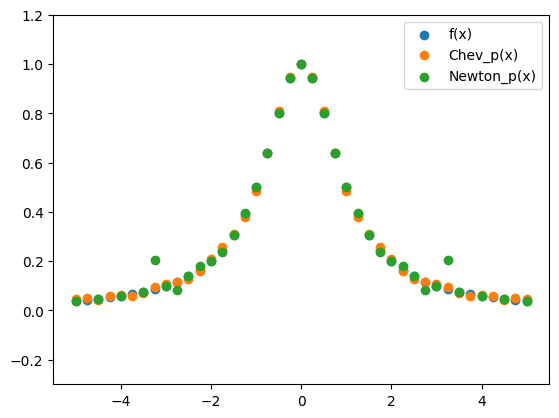

In [ ]:
y_range1 = df.iloc[:, 0]
y_range2 = df.iloc[:, 1]
y_range3 = df.iloc[:, 2]
x_range1 = np.arange(-5, 5.1, 0.25)
plt.figure()
plt.ylim(-0.3, 1.2)
plt.scatter(x_range1, y_range1, label='f(x)')
plt.scatter(x_range1, y_range2, label='Chev_p(x)')
plt.scatter(x_range1, y_range3, label='Newton_p(x)')
plt.legend()
plt.plot()

In [ ]:
#3

x3 = Chev_node(-1, 1, 13)
y3 = np.arctan(x3)
e = 0
Chevcoef = Coef(y3, x3, 13)
df = []
for i in range(100):
  t = -1 + 2/100*i
  temp_y1 = Eval(Chevcoef, x3, 13, t)
  real_y = np.arctan(t)
  error1 = real_y - temp_y1
  if error1 > e:
    e = error1
  df.append([real_y, temp_y1, error1])

df = pd.DataFrame(df, columns=['f(x)', 'Chev_p(x)', 'error1'])
print('max error : {}'.format(e))
df

max error : 4.199712922980936e-07


,f(x),Chev_p(x),error1
0,-0.785398,-0.785399,4.199713e-07
1,-0.775297,-0.775297,-3.955580e-07
2,-0.764993,-0.764993,-2.816823e-07
3,-0.754480,-0.754480,6.720756e-08
4,-0.743756,-0.743756,3.319098e-07
...,...,...,...
95,0.732815,0.732816,-4.135478e-07
96,0.743756,0.743756,-3.319098e-07
97,0.754480,0.754480,-6.720756e-08
98,0.764993,0.764993,2.816823e-07


In [ ]:
#5
x5 = Chev_node(-1/np.sqrt(2), 1/np.sqrt(2), 15)
y5 = np.arcsin(x5)
e = 0
Chevcoef = Coef(y5, x5, 15)
df = []
for i in range(15*4 + 1):
  t = -1/np.sqrt(2) + np.sqrt(2)/60*i
  temp_y5 = Eval(Chevcoef, x5, 15, t)
  real_y5 = np.arcsin(t)
  error1 = real_y5 - temp_y5
  if error1 > e:
    e = error1
  df.append([real_y5, temp_y5, error1])

df = pd.DataFrame(df, columns=['f(x)', 'Chev_p(x)', 'error1'])
print('max error : {}'.format(e))
df

max error : 1.4289659233668317e-08


,f(x),Chev_p(x),error1
0,-0.785398,-0.785398,-1.428966e-08
1,-0.752597,-0.752597,7.078895e-09
2,-0.720774,-0.720774,-1.110036e-08
3,-0.689817,-0.689817,-6.647466e-09
4,-0.659632,-0.659632,4.982270e-09
...,...,...,...
56,0.659632,0.659632,-4.982270e-09
57,0.689817,0.689817,6.647466e-09
58,0.720774,0.720774,1.110036e-08
59,0.752597,0.752597,-7.078896e-09


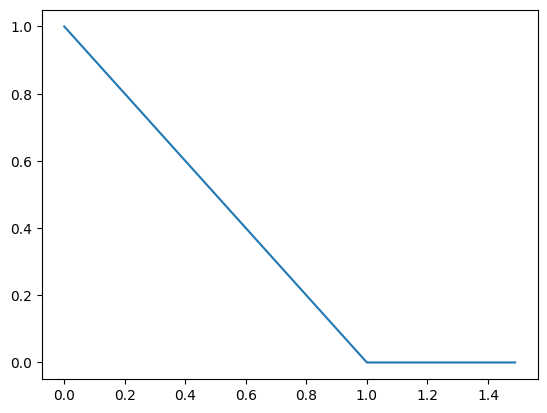

In [ ]:
#7
#체비셰프 노드를 이용한 32차 보간 다항식이 오차가 가장 작음
def f7(x):
  fx = np.max([0, 1-x])
  return fx

x7 = np.arange(0, 1.5, 0.01)
y7 = [f7(x) for x in x7]
plt.figure()
plt.plot(x7, y7)
plt.show()

In [ ]:
x71 = np.arange(-4, 4.01, 8/2)
y71 = [f7(x) for x in x71]

x72 = np.arange(-4, 4.01, 8/4)
y72 = [f7(x) for x in x72]

x73 = np.arange(-4, 4.01, 8/8)
y73 = [f7(x) for x in x73]

x74 = np.arange(-4, 4.01, 8/16)
y74 = [f7(x) for x in x74]

x75 = np.arange(-4, 4.01, 8/32)
y75 = [f7(x) for x in x75]

Coef(y75, x75, 8)

array([ 5.  , -1.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,
        2.75,  2.5 ,  2.25,  2.  ,  1.75,  1.5 ,  1.25,  1.  ,  0.75,
        0.5 ,  0.25,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,
        0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ])

In [ ]:
df = pd.DataFrame([])
for i in range(128):
  t = -4 + 8/127*i
  temp_y71 = Eval(Coef(y71, x71, 2), x71, 2, t)
  temp_y72 = Eval(Coef(y72, x72, 4), x72, 4, t)
  temp_y73 = Eval(Coef(y73, x73, 8), x73, 8, t)
  temp_y74 = Eval(Coef(y74, x74, 16), x74, 16, t)
  temp_y75 = Eval(Coef(y75, x75, 32), x75, 32, t)

  real_y7 = f7(t)
  error1 = real_y7 - temp_y71
  error2 = real_y7 - temp_y72
  error3 = real_y7 - temp_y73
  error4 = real_y7 - temp_y74
  error5 = real_y7 - temp_y75

  # if error1 > e:
  #   e = error1
  arr = np.reshape([real_y7, temp_y71, temp_y72, temp_y73, temp_y74, temp_y75, error1, error2, error3, error4, error5], (1, -1))
  df1 = pd.DataFrame(arr)

  #df1 = pd.DataFrame([real_y7, error1, error2, error3, error4, error5])
  df = pd.concat([df, df1])

# df = pd.DataFrame(df, columns=['f7(x)' ,'error1', 'error2', 'error3', 'error4', 'error5'])
#print('max error : {}'.format(e))
df.columns = ['f7(x)', 'y71', 'y72', 'y73', 'y74', 'y75' ,'error1', 'error2', 'error3', 'error4', 'error5']
df.index = np.arange(128)
df

,f7(x),y71,y72,y73,y74,y75,error1,error2,error3,error4,error5
0,5.000000,5.000000,5.000000,5.000000e+00,5.000000e+00,5.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000
1,4.937008,4.913758,4.954443,4.789500e+00,1.289518e+01,58223.614022,0.023250,-0.017435,1.475082e-01,-7.958170e+00,-58218.677014
2,4.874016,4.828260,4.907062,4.624993e+00,1.494017e+01,33824.978112,0.045756,-0.033046,2.490232e-01,-1.006616e+01,-33820.104096
3,4.811024,4.743505,4.857934,4.498042e+00,1.398773e+01,10323.119454,0.067518,-0.046910,3.129817e-01,-9.176704e+00,-10318.308430
4,4.748031,4.659495,4.807134,4.401276e+00,1.179238e+01,-165.386461,0.088536,-0.059103,3.467551e-01,-7.044351e+00,170.134493
...,...,...,...,...,...,...,...,...,...,...,...
123,0.000000,-0.025544,-0.030345,-6.730841e-01,1.302521e+01,-304.531427,0.025544,0.030345,6.730841e-01,-1.302521e+01,304.531427
124,0.000000,-0.020274,-0.023042,-6.016459e-01,1.679417e+01,18284.482168,0.020274,0.023042,6.016459e-01,-1.679417e+01,-18284.482168
125,0.000000,-0.014260,-0.015521,-4.741930e-01,1.823943e+01,59351.900590,0.014260,0.015521,4.741930e-01,-1.823943e+01,-59351.900590
126,0.000000,-0.007502,-0.007825,-2.783158e-01,1.428162e+01,101216.385736,0.007502,0.007825,2.783158e-01,-1.428162e+01,-101216.385736


In [ ]:
df.iloc[:, -5:].max()

error1       0.374977
error2       0.087091
error3       0.699440
error4       1.796555
error5    4377.606695
dtype: float64

In [ ]:
x76 = Chev_node(-4, 4, 4)
y76 = [f7(x) for x in x76]

x77 = Chev_node(-4, 4, 16)
y77 = [f7(x) for x in x77]

x78 = Chev_node(-4, 4, 32)
y78 = [f7(x) for x in x78]

In [ ]:
df2 = pd.DataFrame([])
for i in range(128):
  t = -4 + 8/127*i
  temp_y76 = Eval(Coef(y76, x76, 4), x76, 4, t)
  temp_y77 = Eval(Coef(y77, x77, 16), x77, 16, t)
  temp_y78 = Eval(Coef(y78, x78, 32), x78, 32, t)

  real_y7 = f7(t)
  error1 = real_y7 - temp_y76
  error2 = real_y7 - temp_y77
  error3 = real_y7 - temp_y78

  # if error1 > e:
  #   e = error1
  arr = np.reshape([real_y7, temp_y76, temp_y77, temp_y78, error1, error2, error3], (1, -1))
  df1 = pd.DataFrame(arr)

  #df1 = pd.DataFrame([real_y7, error1, error2, error3, error4, error5])
  df2 = pd.concat([df2, df1])

# df = pd.DataFrame(df, columns=['f7(x)' ,'error1', 'error2', 'error3', 'error4', 'error5'])
#print('max error : {}'.format(e))
df2.columns = ['f7(x)', 'y76', 'y77', 'y78','error1', 'error2', 'error3']
df2.index = np.arange(128)
df2

,f7(x),y76,y77,y78,error1,error2,error3
0,5.000000,4.951141,5.002955,5.000555,0.048859,-0.002955,-0.000555
1,4.937008,4.905786,4.934032,4.937521,0.031222,0.002976,-0.000513
2,4.874016,4.858583,4.872736,4.873766,0.015433,0.001280,0.000250
3,4.811024,4.809613,4.812595,4.810606,0.001411,-0.001572,0.000418
4,4.748031,4.758954,4.751092,4.748442,-0.010923,-0.003061,-0.000410
...,...,...,...,...,...,...,...
123,0.000000,-0.003197,0.002546,0.000971,0.003197,-0.002546,-0.000971
124,0.000000,0.000386,0.001318,-0.000976,-0.000386,-0.001318,0.000976
125,0.000000,0.003928,-0.001082,-0.000571,-0.003928,0.001082,0.000571
126,0.000000,0.007379,-0.002533,0.001169,-0.007379,0.002533,-0.001169


In [ ]:
df2.iloc[:, -3:].max()

error1    0.111131
error2    0.031159
error3    0.016849
dtype: float64

In [ ]:
#9
df = pd.DataFrame([])

x91 = np.arange(-1, 1.01, 2/10)
y91 = np.abs(x91)

x92 = Chev_node(-1, 1, 10)
y92 = np.abs(x92)

for i in range(41):
  t = -1 + 2/40*i
  real_y9 = np.abs(t)
  temp_y91 = Eval(Coef(y91, x91, 10), x91, 10, t)
  temp_y92 = Eval(Coef(y92, x92, 10), x92, 10, t)

  error1 = real_y9 - temp_y91
  error2 = real_y9 - temp_y92
  arr = np.reshape([real_y9, temp_y91, temp_y92, error1, error2], (1, -1))
  df1 = pd.DataFrame(arr)
  df = pd.concat([df, df1])

df.columns = ['|x|', 'y91', 'y92','error1', 'error2']
df.index = np.arange(41)
print(df.iloc[:, -2:].max())
df

error1    0.651378
error2    0.053770
dtype: float64


,|x|,y91,y92,error1,error2
0,1.00,1.000000e+00,1.012815e+00,0.000000e+00,-1.281550e-02
1,0.95,2.986221e-01,9.373836e-01,6.513779e-01,1.261642e-02
2,0.90,3.686188e-01,9.034791e-01,5.313812e-01,-3.479091e-03
3,0.85,6.180571e-01,8.646372e-01,2.319429e-01,-1.463724e-02
4,0.80,8.000000e-01,8.110019e-01,0.000000e+00,-1.100194e-02
5,0.75,8.542293e-01,7.484025e-01,-1.042293e-01,1.597460e-03
6,0.70,8.060211e-01,6.861893e-01,-1.060211e-01,1.381072e-02
7,0.65,7.062174e-01,6.311716e-01,-5.621740e-02,1.882843e-02
8,0.60,6.000000e-01,5.855645e-01,1.110223e-16,1.443546e-02
9,0.55,5.145203e-01,5.473356e-01,3.547967e-02,2.664417e-03


# 4.3 미분의 근사와 리처드슨 보외법

In [ ]:
def Approx(L, h, df3):
  for i in range(3):
    L += h**(2*i + 2) * df3[i] / math.factorial(2*(i+1) + 1)

  return L

In [ ]:
def Derivative(f, x, n, h):
  df_ = np.zeros((n+1, n+1))
  df_[0, 0] = (f(x + h) - f(x - h))/(2*h)
  h = h/2
  for i in np.arange(1, n+1):
    df_[i, 0] = (f(x + h) - f(x - h))/(2*h)
    for j in np.arange(1, i+1):
      df_[i, j] = df_[i, j-1] + (df_[i, j-1] - df_[i-1, j-1])/(4**j - 1)
    h = h/2

  return df_[n, n], pd.DataFrame(df_)

In [ ]:
#1

Derivative(np.sin, 1.2309594154, 10, 1)[1]

,0,1,2,3,4,5,6,7,8,9,10
0,0.280490,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.319617,0.332659,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.329872,0.333290,0.333332,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.332466,0.333331,0.333333,0.333333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.333116,0.333333,0.333333,0.333333,0.333333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.333279,0.333333,0.333333,0.333333,0.333333,0.333333,0.000000,0.000000,0.000000,0.000000,0.000000
6,0.333320,0.333333,0.333333,0.333333,0.333333,0.333333,0.333333,0.000000,0.000000,0.000000,0.000000
7,0.333330,0.333333,0.333333,0.333333,0.333333,0.333333,0.333333,0.333333,0.000000,0.000000,0.000000
8,0.333332,0.333333,0.333333,0.333333,0.333333,0.333333,0.333333,0.333333,0.333333,0.000000,0.000000
9,0.333333,0.333333,0.333333,0.333333,0.333333,0.333333,0.333333,0.333333,0.333333,0.333333,0.000000


In [ ]:
Derivative(np.cos, 0, 8, 1)[1]
#cos(x+h) = cos(h) = cos(-h) = cos(x-h)

,0,1,2,3,4,5,6,7,8
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
Derivative(np.arctan, 1, 10, 1)[1]

,0,1,2,3,4,5,6,7,8,9,10
0,0.553574,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.519146,0.507670,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.505109,0.500429,0.499947,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.501296,0.500025,0.499998,0.499999,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.500325,0.500002,0.500000,0.500000,0.5,0.0,0.0,0.0,0.0,0.0,0.0
5,0.500081,0.500000,0.500000,0.500000,0.5,0.5,0.0,0.0,0.0,0.0,0.0
6,0.500020,0.500000,0.500000,0.500000,0.5,0.5,0.5,0.0,0.0,0.0,0.0
7,0.500005,0.500000,0.500000,0.500000,0.5,0.5,0.5,0.5,0.0,0.0,0.0
8,0.500001,0.500000,0.500000,0.500000,0.5,0.5,0.5,0.5,0.5,0.0,0.0
9,0.500000,0.500000,0.500000,0.500000,0.5,0.5,0.5,0.5,0.5,0.5,0.0


In [ ]:
Derivative(np.abs, 0, 10, 1)[1]
#np.abs(0+h) = np.abs(0-h)

,0,1,2,3,4,5,6,7,8,9,10
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
#3
def f3(x):
  a = 1
  b = np.cos(x)
  for i in np.arange(1, 6):
    c = b
    b = np.sqrt(a*b)
    a = (a+c)/2

  f = 2*np.arctan(1)/a
  return f

Derivative(f3, 0.25, 10, 1)[1]

,0,1,2,3,4,5,6,7,8,9,10
0,0.377787,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.229519,0.180096,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.208395,0.201354,0.202771,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.203654,0.202073,0.202121,0.202111,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.202498,0.202113,0.202116,0.202116,0.202116,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.202211,0.202116,0.202116,0.202116,0.202116,0.202116,0.000000,0.000000,0.000000,0.000000,0.000000
6,0.202140,0.202116,0.202116,0.202116,0.202116,0.202116,0.202116,0.000000,0.000000,0.000000,0.000000
7,0.202122,0.202116,0.202116,0.202116,0.202116,0.202116,0.202116,0.202116,0.000000,0.000000,0.000000
8,0.202117,0.202116,0.202116,0.202116,0.202116,0.202116,0.202116,0.202116,0.202116,0.000000,0.000000
9,0.202116,0.202116,0.202116,0.202116,0.202116,0.202116,0.202116,0.202116,0.202116,0.202116,0.000000


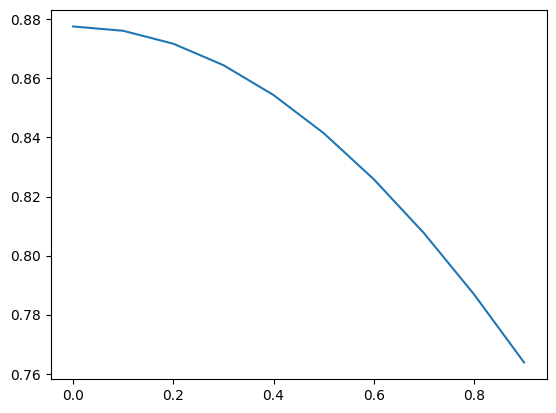

In [ ]:
#5
d5 = [-np.cos(0.5), np.cos(0.5), -np.cos(0.5)]
y5 = []
for i in range(10):
  y5.append(Approx(np.cos(0.5), i/10, d5))

plt.figure()
plt.plot(np.arange(10)/10, y5)
plt.show()